# Capstone Project - Report for Arvato Financial Services
## Part 0: Data wrangling



In [101]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Defining functions

In [102]:
def df_overview(df, name):
    
    """
    The df_overview function prints relevant information about a data frame's basic properties, such as:
    - Name, number of rows, number of missing values and number of columns
    - List of columns by data type
    - Number of missing values by column


    Args
    df: data frame

    Return
    There is nos return for this function, it only prints information

    """
    
    print('Data:', name)
    print('Number of rows:', df.shape[0])
    print('Rows with missing values:', df.isna().any(axis=1).sum())
    print('Number of columns:', df.shape[1])

    for t, n in df.dtypes.value_counts().items():
        col_types = df.select_dtypes(include=t).columns.tolist()
        
        if len(col_types)<=30: print(f'Columns of type {t}:', col_types) # few features: print features names
        else: print(f'Columns of type {t}:', len(col_types)) # many features: print number of features
    
    col_na = [item for item in df.isna().sum().items() if item[1]>0]
    
    if len(col_na)<= 20: print('Missing values by column:\n', col_na) # few columns with NA: print numer of missing by column
    else: print('Number of columns with missing values:', len(col_na)) # many columns with NA: print number columns with missing

In [103]:
# Initial exclusions due to data inconsistencies

def df_cleaner(df, name, pk=None):
   
    """
    This function performs initial data treatments such as exclusion of duplicates and of rows or columns with all values 
    missing.

    Args
    df: data frame
    name: a name to identify the data frame in the report (printed information)
    pk: column that represent a primary key, if applicable

    Return
    There is nos return for this function, it only prints information of the exclusions applied and the final shape of the
    data frame

    """

    print('Data:', name)

    # Excluding duplicated rows
    if pk == None:
        ndup = df.duplicated().sum()
        df = df.drop_duplicates()
        print('Number of duplicated rows excluded:', ndup)
    else:
        ndup = df.duplicated(subset=[pk], keep=False).sum()
        df.drop_duplicates(subset=[pk] , inplace=True)
        print('Number of duplicated rows excluded:', ndup)
        
    # Columns with all values missing
    cols_to_drop = df.columns.to_series()[df.isna().sum() == df.shape[0]] 
    df.drop(cols_to_drop, axis=1, inplace=True)
    print('Colmuns dropped (100% missing):', cols_to_drop)

    # Rows with all values missing
    rows_to_drop = list(df.index[df.isna().sum(axis=1) == df.shape[1]])
    if rows_to_drop!=[]: df = df[not(rows_to_drop)]
    print('Rows dropped (100% missing):', len(rows_to_drop))
    
    print('Final shape:', df.shape)

In [104]:
# Percentage of missing by column

def perc_miss(df, name, most=20):
        
    """
    This function lists the percentage of the columns and rows with that have at least one missing information. Furthermore,
    lists the which columns and rows has the highest percentages of missing data.

    Args
    df: data frame
    name: a name to identify the data frame in the report (printed information)
    most: number of columns and rows to be printed with the highest missing values percentage (top most)

    Return
    There is nos return for this function, it only prints information of missing data by rows and columns

    """

    print(f'---------- Data: {name} ---------- \n')
    
    # Columns with missing 
    missing = df.isnull().sum()
    missing = missing[missing > 0]
        
    print("Columns with at least one missing: {} ({}% of all columns) ".format(len(missing), round(len(missing)/df.shape[1]*100,1)),'\n')
    print(f'{most} columns with highest percentage of missing rows')
    print(missing.div(df.shape[0]).sort_values(ascending=False)[:most], '\n')
    
    # Rows with most missing
    missing = df.isna().sum(axis=1)
    missing = missing[missing>0]

    print("Rows with at least one missing: {} ({}% of all rows) ".format(len(missing), round(len(missing)/df.shape[0]*100,1)),'\n')
    print(f'{most} rows with highest percentage of missing features')
    print(missing.div(df.shape[1]).sort_values(ascending=False)[:most], '\n')

### Azdias data

In [181]:
# Loading data
azdias_sample = pd.read_csv('azdias_sample.csv')
azdias_sample.name = 'Germany sample'

In [182]:
# Data frame overview
df_overview(azdias_sample, azdias_sample.name)

Data: Germany sample
Number of rows: 178244
Rows with missing values: 178187
Number of columns: 366
Columns of type float64: 269
Columns of type int64: 93
Columns of type object: ['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ']
Number of columns with missing values: 273


In [183]:
# Applying initial treatments
df_cleaner(azdias_sample, azdias_sample.name)

Data: Germany sample
Number of duplicated rows excluded: 0
Colmuns dropped (100% missing): Series([], dtype: object)
Rows dropped (100% missing): 0
Final shape: (178244, 366)


In [184]:
# Evaluating missing percentages - top 20
perc_miss(azdias_sample, azdias_sample.name)

---------- Data: Germany sample ---------- 

Columns with at least one missing: 273 (74.6% of all columns)  

20 columns with highest percentage of missing rows
ALTER_KIND4                    0.998693
ALTER_KIND3                    0.993307
ALTER_KIND2                    0.966871
ALTER_KIND1                    0.909680
EXTSEL992                      0.733859
KK_KUNDENTYP                   0.656179
ALTERSKATEGORIE_FEIN           0.296924
D19_SOZIALES                   0.290725
D19_VERSI_ONLINE_QUOTE_12      0.290725
D19_VERSAND_ONLINE_QUOTE_12    0.290725
D19_TELKO_ONLINE_QUOTE_12      0.290725
D19_BANKEN_ONLINE_QUOTE_12     0.290725
D19_LOTTO                      0.290725
D19_LETZTER_KAUF_BRANCHE       0.290725
D19_KONSUMTYP                  0.290725
D19_GESAMT_ONLINE_QUOTE_12     0.290725
KBA05_MAXVORB                  0.150776
KBA05_MAXSEG                   0.150776
KBA05_KW2                      0.150776
KBA05_MAXHERST                 0.150776
dtype: float64 

Rows with at least one

In [185]:
# Excluding columns with more than 16% of missing values
missing = azdias_sample.isnull().sum()
cols_to_drop = missing[missing > int(0.16*azdias_sample.shape[0])].index
print(azdias_sample[cols_to_drop].nunique())
azdias_sample = azdias_sample.drop(columns=cols_to_drop)

ALTER_KIND1                    17
ALTER_KIND2                    17
ALTER_KIND3                    13
ALTER_KIND4                    12
ALTERSKATEGORIE_FEIN           25
D19_BANKEN_ONLINE_QUOTE_12     10
D19_GESAMT_ONLINE_QUOTE_12     11
D19_KONSUMTYP                   7
D19_LETZTER_KAUF_BRANCHE       35
D19_LOTTO                       8
D19_SOZIALES                    6
D19_TELKO_ONLINE_QUOTE_12       4
D19_VERSAND_ONLINE_QUOTE_12    11
D19_VERSI_ONLINE_QUOTE_12       6
EXTSEL992                      56
KK_KUNDENTYP                    6
dtype: int64


In [186]:
# Evaluating numerical features
numeric_cols = azdias_sample.select_dtypes(exclude=np.object).columns.tolist()
azdias_sample[numeric_cols].describe()
azdias_sample[numeric_cols].nunique().sort_values(ascending=False).head(10)

LNR                           178244
KBA13_ANZAHL_PKW                1258
ANZ_HAUSHALTE_AKTIV              268
ANZ_STATISTISCHE_HAUSHALTE       240
GEBURTSJAHR                      116
VERDICHTUNGSRAUM                  46
LP_LEBENSPHASE_FEIN               41
EINGEZOGENAM_HH_JAHR              34
MIN_GEBAEUDEJAHR                  32
ANZ_PERSONEN                      22
dtype: int64

In [187]:
# Understanding LNR values
np.array(azdias_sample['LNR'].head(20))

array([ 727324,  822980,  784366,  674649,  766107,  581777,  852487,
        988599, 1001076,  232337,  382585,  736912,  884392,  734481,
        561877,  434724,  731166,  822867,  879110,  273764], dtype=int64)

In [188]:
# Excluding LNR because it seems to be some primary key (one value for each observation)
azdias_sample = azdias_sample.drop(columns=['LNR'])

In [189]:
# List of columns that require further evaluation
cols_to_exam = ['KBA13_ANZAHL_PKW', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_STATISTISCHE_HAUSHALTE','GEBURTSJAHR','VERDICHTUNGSRAUM',
                'LP_LEBENSPHASE_FEIN','MIN_GEBAEUDEJAHR','ANZ_PERSONEN']

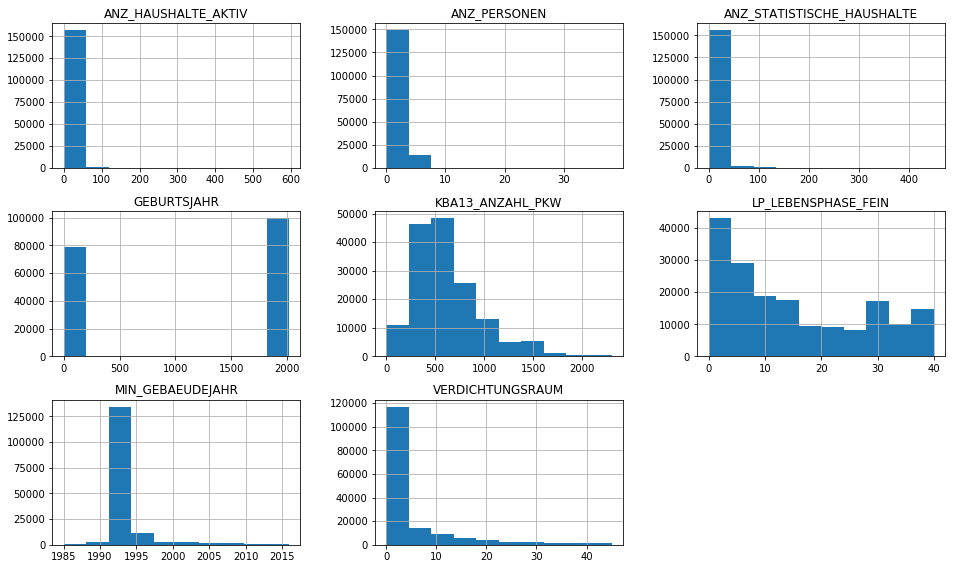

In [190]:
azdias_sample[cols_to_exam].hist(figsize=(16,len(cols_to_exam)*1.2));

In [191]:
azdias_sample[cols_to_exam].describe()

,KBA13_ANZAHL_PKW,ANZ_HAUSHALTE_AKTIV,ANZ_STATISTISCHE_HAUSHALTE,GEBURTSJAHR,VERDICHTUNGSRAUM,LP_LEBENSPHASE_FEIN,MIN_GEBAEUDEJAHR,ANZ_PERSONEN
count,156930.000000,159443.000000,159443.000000,178244.000000,158601.000000,177304.000000,159443.000000,163441.000000
mean,620.222284,8.281003,7.594871,1097.955550,4.565110,14.632016,1993.277272,1.730465
std,340.291222,15.639096,14.455010,976.984282,8.440954,12.622097,3.335349,1.162477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,0.000000
25%,384.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1992.000000,1.000000
50%,550.000000,4.000000,3.000000,1943.000000,1.000000,11.000000,1992.000000,1.000000
75%,779.000000,9.000000,9.000000,1970.000000,5.000000,27.000000,1993.000000,2.000000
max,2300.000000,595.000000,449.000000,2017.000000,45.000000,40.000000,2016.000000,38.000000


In [192]:
azdias_sample[cols_to_exam].isnull().sum()/ azdias_sample.shape[0]

KBA13_ANZAHL_PKW              0.119578
ANZ_HAUSHALTE_AKTIV           0.105479
ANZ_STATISTISCHE_HAUSHALTE    0.105479
GEBURTSJAHR                   0.000000
VERDICHTUNGSRAUM              0.110203
LP_LEBENSPHASE_FEIN           0.005274
MIN_GEBAEUDEJAHR              0.105479
ANZ_PERSONEN                  0.083049
dtype: float64

In [193]:
# Excluding GEBURTSJAHR because it has too many 0
azdias_sample = azdias_sample.drop(columns=['GEBURTSJAHR'])

In [194]:
# Understanding ANZ_STATISTISCHE_HAUSHALTE values
np.array(azdias_sample['ANZ_STATISTISCHE_HAUSHALTE'].head(20))

array([56.,  3.,  3., nan,  3., 32., 11., 22.,  2.,  3.,  1.,  2.,  5.,
        3.,  2., 11.,  3., 77.,  3.,  2.])

In [195]:
# Understanding VERDICHTUNGSRAUM values
np.array(azdias_sample['VERDICHTUNGSRAUM'].head(20))

array([ 1.,  1.,  0., nan,  0.,  0.,  1.,  6.,  3.,  0.,  8.,  3.,  1.,
        0.,  0.,  8.,  7.,  4., 29.,  2.])

In [196]:
# Understanding EINGEZOGENAM_HH_JAHR values
np.array(azdias_sample['EINGEZOGENAM_HH_JAHR'].head(20))

array([2006., 2016., 2001.,   nan, 1998., 1997., 1994., 2004., 2004.,
       2009., 1999., 1994., 1994., 1999., 2011., 2001., 1999., 2002.,
       2004., 2014.])

In [197]:
# Removing excluded features from the numerical columns to be evaluated
numeric_cols.remove('LNR')
numeric_cols.remove('GEBURTSJAHR')

In [198]:
# Evaluate which features have -1 and/or 9 as missing data category ()"unknown")
has_9 = []
has_1 = []

for col in numeric_cols:
    values = azdias_sample[col].unique()
    if ((9.0 in values) or (9 in values)) and len(values)<9: has_9.append(col)
    elif (-1.0 in values) or (-1 in values): has_1.append(col)

print('Nº of columns with 9:', len(has_9))
print('Nº of columns with -1:', len(has_1))
print('Columns with 9 and -1:', [col for col in has_9 if col in has_1])

Nº of columns with 9: 63
Nº of columns with -1: 4
Columns with 9 and -1: []


In [199]:
# Number of columns with no -1 nor 9 as missing data category
numeric_others = [c for c in numeric_cols if c not in has_9 and c not in has_1]
len(numeric_others)

278

In [200]:
# Replacing missing values with 9 or -1 in numeric columns
azdias_sample[has_9] = azdias_sample[has_9].fillna(9)
azdias_sample[has_1] = azdias_sample[has_1].fillna(-1)

# Replacing missing values by median were 9 and -1 don't apply
azdias_sample[numeric_others] = azdias_sample[numeric_others].fillna(azdias_sample[numeric_others].median())

In [201]:
# Evaluating categorical features
cat_cols = azdias_sample.select_dtypes(include=np.object).columns.tolist()
azdias_sample[cat_cols].nunique().sort_values(ascending=False).head(10)

EINGEFUEGT_AM     3440
CAMEO_DEU_2015      45
OST_WEST_KZ          2
dtype: int64

In [202]:
# Understanding EINGEFUEGT_AM values
azdias_sample['EINGEFUEGT_AM'].unique()[:20]

array(['1992-02-12 00:00:00', '2000-05-24 00:00:00', nan,
       '1992-02-10 00:00:00', '1992-12-28 00:00:00',
       '1996-10-31 00:00:00', '1995-08-15 00:00:00',
       '1995-02-07 00:00:00', '1994-03-28 00:00:00',
       '1994-02-16 00:00:00', '2011-02-02 00:00:00',
       '1992-02-21 00:00:00', '1996-05-30 00:00:00',
       '1993-11-03 00:00:00', '1996-01-05 00:00:00',
       '2000-03-31 00:00:00', '1996-06-27 00:00:00',
       '1993-01-22 00:00:00', '2013-09-19 00:00:00',
       '1997-08-05 00:00:00'], dtype=object)

In [203]:
# Excluding EINGEFUEGT_AM column as it seems to represent some processing information
azdias_sample = azdias_sample.drop(columns=['EINGEFUEGT_AM'])

In [204]:
# Understanding CAMEO_DEU_2015 values
azdias_sample['CAMEO_DEU_2015'].unique()[:20]

array(['9E', '8A', '5B', nan, '3C', '6B', '1C', '8C', '2D', '4D', '8B',
       '7A', '6E', '4C', '9B', '4A', '3D', '7B', '7E', '2C'], dtype=object)

In [205]:
#Categorical columns that needs to be transformed into dummies: ['CAMEO_DEU_2015','OST_WEST_KZ']
dummies = pd.get_dummies(azdias_sample[['CAMEO_DEU_2015','OST_WEST_KZ']], dummy_na=True)
dummies.head()
dummies.shape

(178244, 49)

In [206]:
azdias_sample = pd.concat([azdias_sample.drop(columns=['CAMEO_DEU_2015','OST_WEST_KZ']), dummies], axis=1)
azdias_sample.shape

(178244, 394)

In [207]:
# Checking if there is any column with missing values
print('Columns with missing values:', azdias_sample.isnull().any().sum())

Columns with missing values: 0


### Customer data

In [134]:
# Loading data
customers = pd.read_csv('customers.csv')
customers.name = 'Customers demographics'

In [135]:
# Data frame overview
df_overview(customers, customers.name)

Data: Customers demographics
Number of rows: 191652
Rows with missing values: 191516
Number of columns: 369
Columns of type float64: 269
Columns of type int64: 94
Columns of type object: ['CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ', 'PRODUCT_GROUP', 'CUSTOMER_GROUP']
Number of columns with missing values: 273


In [136]:
# Applying initial treatments
df_cleaner(customers, customers.name)

Data: Customers demographics
Number of duplicated rows excluded: 0
Colmuns dropped (100% missing): Series([], dtype: object)
Rows dropped (100% missing): 0
Final shape: (191652, 369)


In [137]:
# Evaluating missing percentages - top 20
perc_miss(customers, customers.name)

---------- Data: Customers demographics ---------- 

Columns with at least one missing: 273 (74.0% of all columns)  

20 columns with highest percentage of missing rows
ALTER_KIND4       0.998769
ALTER_KIND3       0.993347
ALTER_KIND2       0.973389
ALTER_KIND1       0.938607
KK_KUNDENTYP      0.584064
EXTSEL992         0.444989
KBA05_ANHANG      0.292092
KBA05_MAXHERST    0.292092
KBA05_ALTER2      0.292092
KBA05_MOD8        0.292092
KBA05_MOD4        0.292092
KBA05_MOD2        0.292092
KBA05_MOD1        0.292092
KBA05_MAXVORB     0.292092
KBA05_MAXSEG      0.292092
KBA05_MAXAH       0.292092
KBA05_MAXBJ       0.292092
KBA05_MOTRAD      0.292092
KBA05_KW3         0.292092
KBA05_KW2         0.292092
dtype: float64 

Rows with at least one missing: 191516 (99.9% of all rows)  

20 rows with highest percentage of missing features
74012     0.701897
84107     0.701897
89983     0.701897
176782    0.691057
133476    0.685637
133471    0.685637
133472    0.685637
133473    0.685637
162761  

In [138]:
# Limiting to the same features of azdias data frame
customers = customers[list(azdias_sample.columns)]

In [139]:
# Replacing missing values with 9 or -1 in numeric columns
customers[has_9] = customers[has_9].fillna(9)
customers[has_1] = customers[has_1].fillna(-1)

# Replacing missing values by median were 9 and -1 don't apply
customers[numeric_others] = customers[numeric_others].fillna(customers[numeric_others].median())

In [140]:
#Categorical columns that needs to be transformed into dummies: ['CAMEO_DEU_2015','OST_WEST_KZ']
dummies = pd.get_dummies(customers[['CAMEO_DEU_2015','OST_WEST_KZ']], dummy_na=True)
dummies.head()
dummies.shape

(191652, 49)

In [141]:
customers = pd.concat([customers.drop(columns=['CAMEO_DEU_2015','OST_WEST_KZ']), dummies], axis=1)
customers.shape

(191652, 394)

In [142]:
# Checking if there is any column with missing values
print('Columns with missing values:', X_customers.isnull().any().sum())

Columns with missing values: 17


In [143]:
# Checking if there are features in azdias that are not on customers (important for clustering application)
azdias_columns = set(azdias.columns)
customers_columns = set(customers.columns)
print("Features used for clustering azdias sample that are not on customers data frame:\n", 
      azdias_columns.difference(customers_columns))

Features used for clustering azdias sample that are not on customers data frame:
 set()


### Mailout - train data

In [144]:
# loading data
mailout_train = pd.read_csv('camp_train.csv')
mailout_train.name = 'Mailout train'

In [145]:
# Data frame overview
df_overview(mailout_train, mailout_train.name)

Data: Mailout train
Number of rows: 42962
Rows with missing values: 42936
Number of columns: 367
Columns of type float64: 267
Columns of type int64: 94
Columns of type object: ['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ']
Number of columns with missing values: 273


In [146]:
# Applying initial treatments
df_cleaner(mailout_train, mailout_train.name)

Data: Mailout train
Number of duplicated rows excluded: 0
Colmuns dropped (100% missing): Series([], dtype: object)
Rows dropped (100% missing): 0
Final shape: (42962, 367)


In [147]:
# Evaluating missing percentages - top 20
perc_miss(mailout_train, mailout_train.name)

---------- Data: Mailout train ---------- 

Columns with at least one missing: 273 (74.4% of all columns)  

20 columns with highest percentage of missing rows
ALTER_KIND4       0.999046
ALTER_KIND3       0.995950
ALTER_KIND2       0.982403
ALTER_KIND1       0.953727
KK_KUNDENTYP      0.589265
EXTSEL992         0.371212
W_KEIT_KIND_HH    0.225269
HH_DELTA_FLAG     0.225269
KBA05_ANHANG      0.201294
KBA05_ALTER2      0.201294
KBA05_MOD8        0.201294
KBA05_MOD4        0.201294
KBA05_MOD2        0.201294
KBA05_MOD1        0.201294
KBA05_MAXVORB     0.201294
KBA05_MAXSEG      0.201294
KBA05_KW3         0.201294
KBA05_MAXHERST    0.201294
KBA05_MAXBJ       0.201294
KBA05_MAXAH       0.201294
dtype: float64 

Rows with at least one missing: 42936 (99.9% of all rows)  

20 rows with highest percentage of missing features
20019    0.689373
6641     0.689373
35347    0.689373
35350    0.689373
35351    0.689373
6670     0.689373
35353    0.689373
6669     0.689373
24470    0.689373
16036   

In [148]:
# Forcing CAMEO_DEUG_2015 and CAMEO_INTL_2015 columns to int32
for col in mailout_train.columns[18:20]:
    mailout_train[col] = pd.to_numeric(mailout_train[col], errors='coerce')

In [149]:
# Evaluating if the NA are correctly identified
print(mailout_train['CAMEO_INTL_2015'][:5])
print(mailout_train['CAMEO_INTL_2015'][:5].isna())

0    34.0
1    32.0
2    14.0
3    14.0
4    41.0
Name: CAMEO_INTL_2015, dtype: float64
0    False
1    False
2    False
3    False
4    False
Name: CAMEO_INTL_2015, dtype: bool


In [150]:
# Excluding unnecessary columns
mailout_train = mailout_train.drop(columns=['LNR', 'GEBURTSJAHR', 'EINGEFUEGT_AM', 'D19_LETZTER_KAUF_BRANCHE'])

In [151]:
# Excluding columns with more than 30% of missing values
missing = mailout_train.isnull().sum()
cols_to_drop = missing[missing > int(0.3*mailout_train.shape[0])].index
print(mailout_train[cols_to_drop].nunique())
mailout_train = mailout_train.drop(columns=cols_to_drop)

ALTER_KIND1     17
ALTER_KIND2     14
ALTER_KIND3     12
ALTER_KIND4     11
EXTSEL992       56
KK_KUNDENTYP     6
dtype: int64


In [152]:
# Evaluating numerical features
numeric_cols = mailout_train.select_dtypes(exclude=np.object).columns.tolist()

In [153]:
# Evaluate which features have -1 and/or 9 as missing data category ()"unknown")
has_9 = []
has_1 = []

for col in numeric_cols:
    values = mailout_train[col].unique()
    if ((9.0 in values) or (9 in values)) and len(values)<9: has_9.append(col)
    if (-1.0 in values) or (-1 in values): has_1.append(col)

print('Nº of columns with 9:', len(has_9))
print('Nº of columns with -1:', len(has_1))
print('Columns with 9 and -1:', [col for col in has_9 if col in has_1])

Nº of columns with 9: 64
Nº of columns with -1: 4
Columns with 9 and -1: []


In [154]:
# Number of columns with no -1 nor 9 as missing data category
numeric_others = [c for c in numeric_cols if c not in has_9 and c not in has_1]
len(numeric_others)

287

In [155]:
# Replacing missing values with 9 or -1 in numeric columns
mailout_train[has_9] = mailout_train[has_9].fillna(9)
mailout_train[has_1] = mailout_train[has_1].fillna(-1)

# Replacing missing values by median were 9 and -1 don't apply
mailout_train[numeric_others] = mailout_train[numeric_others].fillna(mailout_train[numeric_others].median())

In [156]:
#Categorical columns that needs to be transformed into dummies: ['CAMEO_DEU_2015','OST_WEST_KZ']
dummies = pd.get_dummies(mailout_train[['CAMEO_DEU_2015','OST_WEST_KZ']], dummy_na=True)
dummies.head()
dummies.shape

(42962, 49)

In [157]:
mailout_train.shape

(42962, 357)

In [158]:
mailout_train = pd.concat([mailout_train.drop(columns=['CAMEO_DEU_2015','OST_WEST_KZ']), dummies], axis=1)
mailout_train.shape

(42962, 404)

In [159]:
# Checking if there is any column with missing values
print('Columns with missing values:', mailout_train.isnull().any().sum())

Columns with missing values: 0


### Mailout - test data

In [160]:
# load in the data
mailout_test = pd.read_csv('camp_test.csv')
mailout_test.name = 'Mailout test'

In [161]:
# Data frame overview
df_overview(mailout_test, mailout_test.name)

Data: Mailout test
Number of rows: 42833
Rows with missing values: 42813
Number of columns: 366
Columns of type float64: 267
Columns of type int64: 93
Columns of type object: ['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ']
Number of columns with missing values: 273


In [162]:
# Applying initial treatments
df_cleaner(mailout_test, mailout_test.name)

Data: Mailout test
Number of duplicated rows excluded: 0
Colmuns dropped (100% missing): Series([], dtype: object)
Rows dropped (100% missing): 0
Final shape: (42833, 366)


In [163]:
# Evaluating missing percentages - top 20
perc_miss(mailout_test, mailout_test.name)

---------- Data: Mailout test ---------- 

Columns with at least one missing: 273 (74.6% of all columns)  

20 columns with highest percentage of missing rows
ALTER_KIND4       0.999089
ALTER_KIND3       0.995307
ALTER_KIND2       0.982210
ALTER_KIND1       0.953004
KK_KUNDENTYP      0.584479
EXTSEL992         0.369085
W_KEIT_KIND_HH    0.224570
HH_DELTA_FLAG     0.224570
KBA05_ANHANG      0.199309
KBA05_ALTER2      0.199309
KBA05_MOD8        0.199309
KBA05_MOD4        0.199309
KBA05_MOD2        0.199309
KBA05_MOD1        0.199309
KBA05_MAXVORB     0.199309
KBA05_MAXSEG      0.199309
KBA05_KW3         0.199309
KBA05_MAXHERST    0.199309
KBA05_MAXBJ       0.199309
KBA05_MAXAH       0.199309
dtype: float64 

Rows with at least one missing: 42813 (100.0% of all rows)  

20 rows with highest percentage of missing features
29637    0.710383
32194    0.691257
34011    0.691257
15224    0.691257
9221     0.691257
33979    0.691257
33988    0.691257
9224     0.691257
2919     0.691257
33998   

In [164]:
# Forcing CAMEO_DEUG_2015 and CAMEO_INTL_2015 columns to int32
for col in mailout_test.columns[18:20]:
    mailout_test[col] = pd.to_numeric(mailout_test[col], errors='coerce')

In [165]:
# Evaluating if the NA are correctly identified
print(mailout_test['CAMEO_INTL_2015'][:5])
print(mailout_test['CAMEO_INTL_2015'][:5].isna())

0    13.0
1    31.0
2    41.0
3    13.0
4    31.0
Name: CAMEO_INTL_2015, dtype: float64
0    False
1    False
2    False
3    False
4    False
Name: CAMEO_INTL_2015, dtype: bool


In [166]:
mailout_test = mailout_test.drop(columns=['LNR', 'GEBURTSJAHR', 'EINGEFUEGT_AM', 'D19_LETZTER_KAUF_BRANCHE'])

In [167]:
# Excluding columns with more than 30% of missing values
missing = mailout_test.isnull().sum()
cols_to_drop = missing[missing > int(0.3*mailout_test.shape[0])].index
print(mailout_test[cols_to_drop].nunique())
mailout_test = mailout_test.drop(columns=cols_to_drop)

ALTER_KIND1     17
ALTER_KIND2     15
ALTER_KIND3     13
ALTER_KIND4     10
EXTSEL992       56
KK_KUNDENTYP     6
dtype: int64


In [168]:
# Evaluating numerical features
numeric_cols = mailout_test.select_dtypes(exclude=np.object).columns.tolist()

In [169]:
# Evaluate which features have -1 and/or 9 as missing data category ()"unknown")
has_9 = []
has_1 = []

for col in numeric_cols:
    values = mailout_test[col].unique()
    if ((9.0 in values) or (9 in values)) and len(values)<9: has_9.append(col)
    if (-1.0 in values) or (-1 in values): has_1.append(col)

print('Nº of columns with 9:', len(has_9))
print('Nº of columns with -1:', len(has_1))
print('Columns with 9 and -1:', [col for col in has_9 if col in has_1])

Nº of columns with 9: 64
Nº of columns with -1: 4
Columns with 9 and -1: []


In [170]:
# Number of columns with no -1 nor 9 as missing data category
numeric_others = [c for c in numeric_cols if c not in has_9 and c not in has_1]
len(numeric_others)

286

In [171]:
# Replacing missing values with 9 or -1 in numeric columns
mailout_test[has_9] = mailout_test[has_9].fillna(9)
mailout_test[has_1] = mailout_test[has_1].fillna(-1)

# Replacing missing values by median were 9 and -1 don't apply
mailout_test[numeric_others] = mailout_test[numeric_others].fillna(mailout_test[numeric_others].median())

In [172]:
#Categorical columns that needs to be treated: ['CAMEO_DEU_2015','OST_WEST_KZ']
dummies = pd.get_dummies(mailout_test[['CAMEO_DEU_2015','OST_WEST_KZ']], dummy_na=True)
dummies.head()
dummies.shape

(42833, 49)

In [173]:
mailout_test.shape

(42833, 356)

In [174]:
mailout_test = pd.concat([mailout_test.drop(columns=['CAMEO_DEU_2015','OST_WEST_KZ']), dummies], axis=1)
mailout_test.shape

(42833, 403)

In [175]:
print('CAMEO_DEU_2015' in mailout_test.columns)
print('OST_WEST_KZ' in mailout_test.columns)

False
False


In [176]:
# Checking if there is any column with missing values
print('Columns with missing values:', mailout_test.isnull().any().sum())

Columns with missing values: 0


In [177]:
# Checking if there are features in train that are not on test (important for model prediction)
train_columns = set(mailout_train.columns)
test_columns = set(mailout_test.columns)
print("Features used for training that are not on testing data frame:\n", 
      train_columns.difference(test_columns))

Features used for training that are not on testing data frame:
 {'RESPONSE'}


### Saving wraggled data sets

In [208]:
azdias_sample.to_csv('azdias_sample_clean.csv', index=False)
customers.to_csv('customers_clean.csv', index=False)
mailout_train.to_csv('mailout_train_clean.csv', index=False)
mailout_test.to_csv('mailout_test_clean.csv', index=False)